In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import sys
import os
import cmocean
import cmocean.cm as cmo

In [15]:
trials = [1,2,3,6,7,8,10]
# trials = np.arange(10)
alphas = np.arange(0.0, 1., 0.1)

logger = []
for trial in trials:
    for alpha in alphas:
        fname = "./saved-outputs/log_alpha" + str(alpha) +\
                "_trial" + str(trial) + ".pkl"
        if os.path.exists(fname):
            log = pd.read_pickle(fname)
            
            logger.append([trial, alpha, log.iloc[-1][1], log.iloc[-1][2]])

In [16]:
df = pd.DataFrame(logger)
df.columns = ['trial', 'alpha', 'tr_mse', 'te_mse']

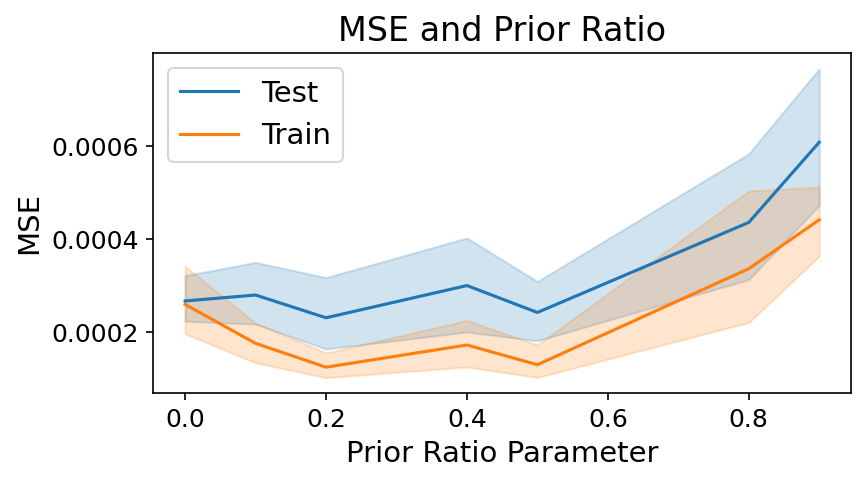

In [29]:
fs = 14

plt.figure(dpi=150, figsize=(6, 3))
sns.lineplot(x='alpha', y='te_mse', data=df, label="Test")
sns.lineplot(x='alpha', y='tr_mse', data=df, label='Train')
plt.title("MSE and Prior Ratio", fontsize=fs+2)
plt.legend(fontsize=fs)
plt.xlabel("Prior Ratio Parameter", fontsize=fs)
plt.ylabel("MSE", fontsize=fs)
plt.tick_params('both', labelsize=fs-2)
plt.savefig("./prior_ratio.pdf", bbox_inches='tight')